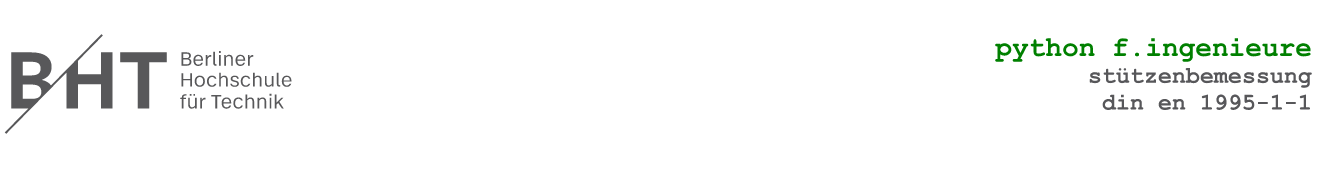

# Anwendungsbeispiel 1: Stützenbemessung

## Allgemein

Besonders leistungsstark ist eine Programmierung, wenn Iterationsprozesse zur Optimierung verwendet werden. Der folgende Algorithmus optimiert die Holzstützenbemessung nach zwei vorgegebenen Parametern, die in der Excel-Oberfläche des Programms definiert werden können. 

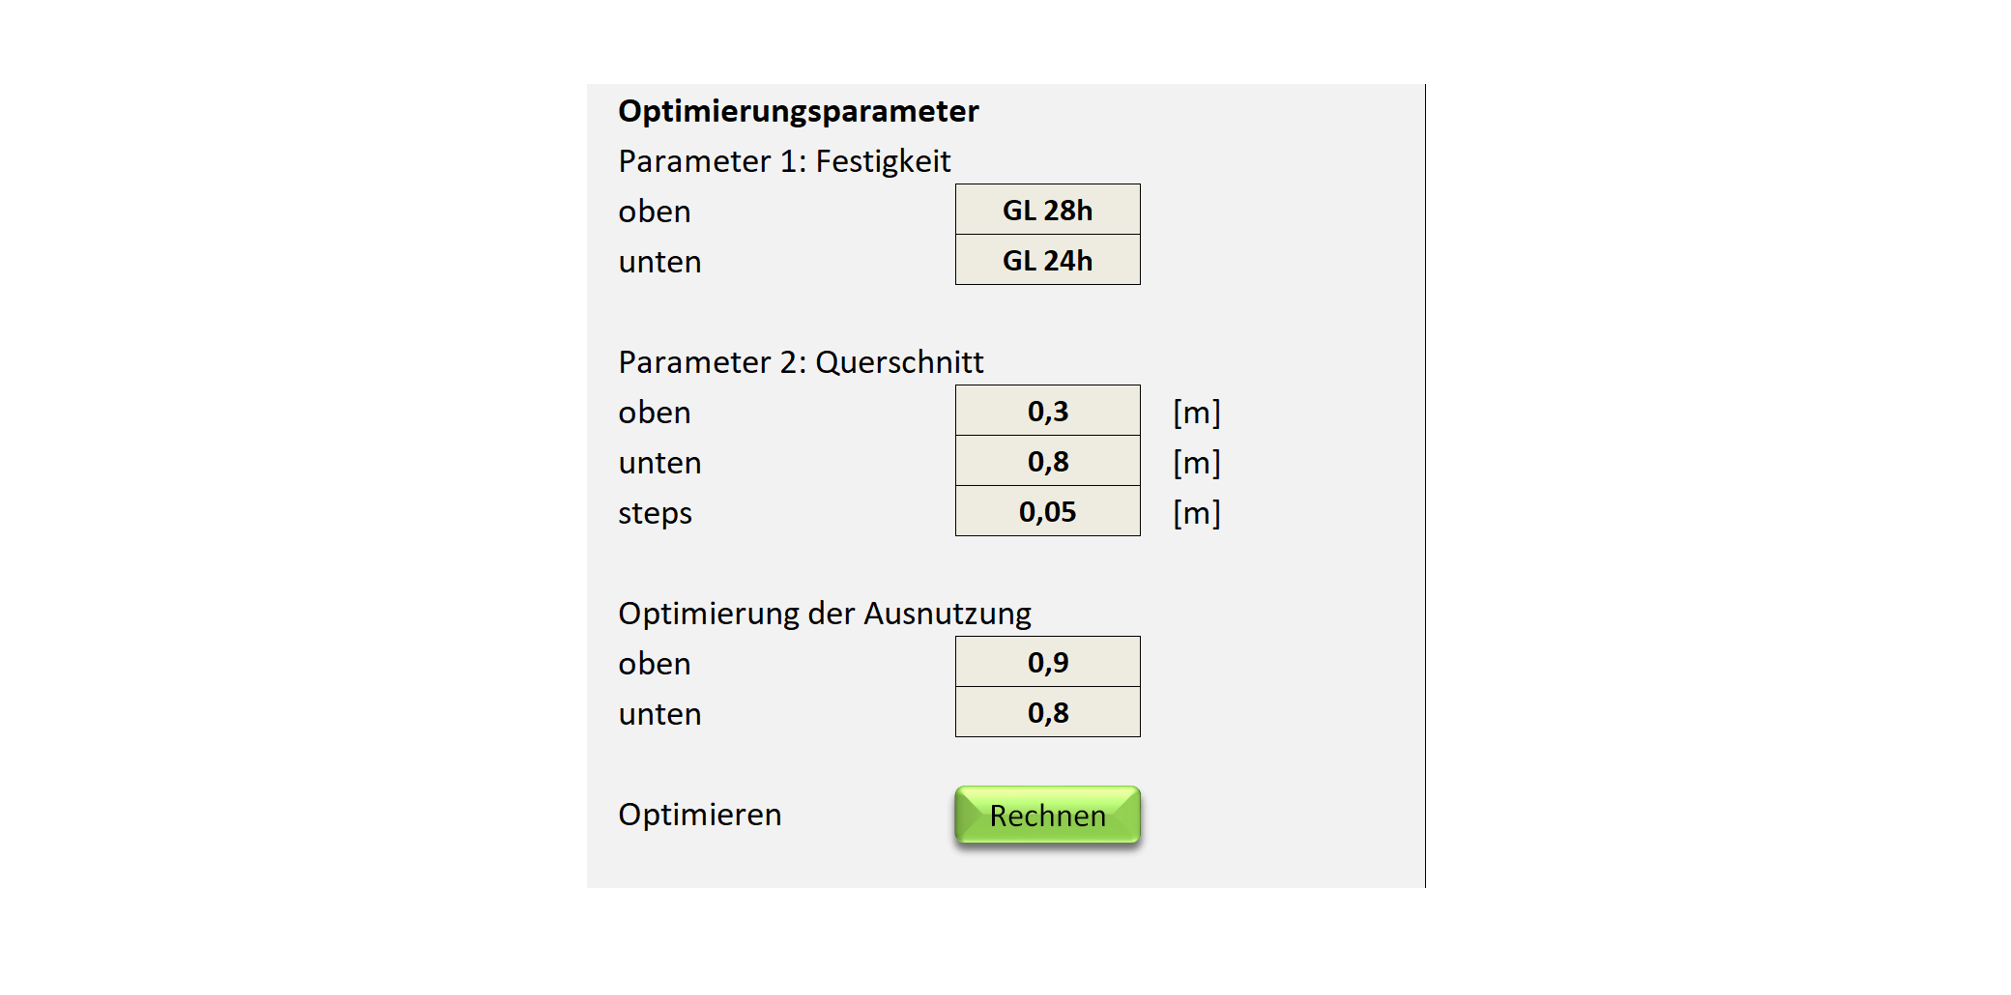
<center> Abbildung 1: Eingabefeld für Optimierungsalgorithmus</center> <br>

Mit diesen Einstellungen durchläuft das Skript alle Stützenpositionen und bemisst die Stütze nach Theorie I. und nach Theorie II. Ordnung und passt die Parameter automatisch innerhalb der definierten Grenzen an, bis der Bereich der gewünschten Ausnutzung erreicht wird.

## Schematischer Ablauf

Der Algorithmus besteht aus zwei Schleifen, mit denen ein zirkulärer Datenaustausch zwischen dem Code und Excel stattfindet. Dadurch wird nach jedem Iterationsschritt ein Zwischenergebnis in Excel geschrieben und die Daten daraufhin neu eingelesen. Der in der Abbildung dargestellte Ablauf zeigt den schematischen Zusammenhang der Schleifen. Nachdem die Daten anfangs in Python eingelesen wurden, beginnt innerhalb der ersten Schleife die Iteration durch die Stützenpositionen. Mit den eingelesenen Daten der ersten Position erfolgt die Stützenbemessung und die Bewertung der Ergebnisse. Hiermit beginnt die Iteration in der zweiten Schleife. Die Bewertung erfolgt durch fünf if-Abfragen, wodurch zunächst die Holzgüte und schließlich der Stützenquerschnitt erhöht oder verringert wird. Nach jeder Iteration der zweiten Schleife werden die angepassten Parameter und Ausnutzung in Excel als Zwischenergebnis geschrieben und die Bemessung erneut ausgeführt. Erst wenn das Ergebnis innerhalb der definierten Ausnutzungsgrenzen liegt oder die fünfte Iteration erreicht ist, wird Schleife 2 verlassen. Wieder werden die Ergebnisse in Excel übergeben und derselbe Vorgang wird mit der nächsten Stützenposition wiederholt.

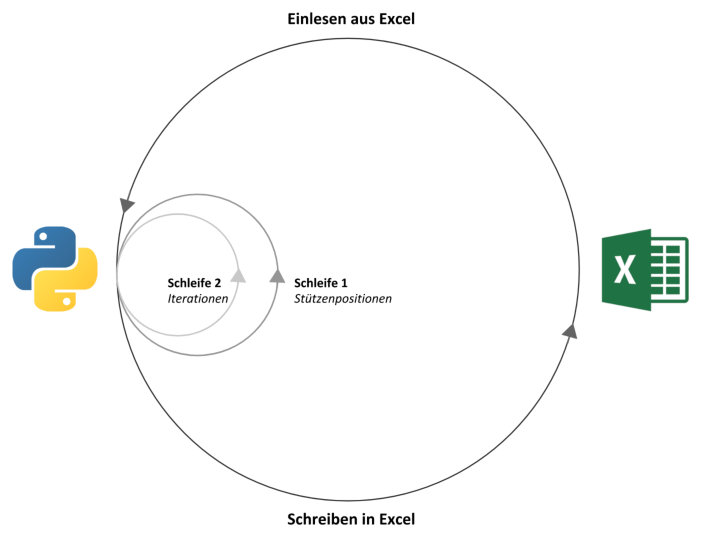
<center> Abbildung 2: Schema zum Optimierungsalgorithmus</center> <br>

## Detaillierter Ablauf

**1. Verknüpfung mit Excel** <br>
Im ersten Teil des Skriptes findet die Verknüpfung mit Excel statt. Wie zuvor wird die Reihenanzahl der Tabelle erfasst und die alten Daten gelöscht. Anschließend werden die Optimierungsparameter und die Listen aller Stützenparameter eingelesen. 
 
 
**2. Sonstige Vorbereitungen** <br>
Im zweiten Schritt werden die für die Schleifen benötigten Listen erstellt und weitere Parameter definiert.
Unter anderem werden Variablen definiert, die den Status der Bemessung angeben. Diese werden nach der letzten Bemessungsiteration in Excel geschrieben. Unterschieden wird zwischen: <br>

```Python
status_1 = 'NW erfüllt' 
status_2 = 'NW n. erbracht' 
status_3 = 'Grenze'
```

  Letzteres wird angegeben, wenn die Grenzen der Parameter erreicht werden und der Nachweis nicht erfüllt wird.
 
**3. Start der Schleife 1** <br>
Nachdem die Vorbereitungen getroffen sind und alle notwendigen Informationen eingelesen sind, kann das Durchlaufen der Stützenpositionen beginnen. Hierzu wird mit einer ```for```-Schleife mit der Variablen ```j``` durch die Anzahl der Positionen ```no_pos``` iteriert. 

```Python
for j in range(no_pos):
```
 
 
**4. Start der Schleife 2** <br>
Innerhalb der ersten Schleife wird nun die zweite Schleife betreten und es wird zunächst mittels einer if-Abfrage geprüft, ob die Position bereits berechnet wurde. Ist dies beispielsweise der zweite Optimierungsvorgang und der Status der Stütze entspricht ```status_2```, wird diese Position übersprungen. Enthält sie jedoch keine Daten, beginnt das Einlesen der Stützenparameter. 

Hierbei ist zu unterscheiden, dass die *statischen* Werte, wie die Länge, Einwirkung etc. anhand des *j-ten* Elementes der Listen eingelesen werden und die sich verändernden Werte, wie die Abmessungen und Holzgüte dynamisch aus Excel eingelesen werden. 
 
 
**5. Stützenmebessung** <br>
Nun wird mittels der definierten Funktionen aus *Kapitel xx* die Stützenbemessung nach Theorie I. und II. Ordnung geführt und der maximale Ausnutzungswert definiert. Anhand dessen, kann nun die Bewertung des Ergebnisses erfolgen.  <br>
 
 
**6. Bewertung der Ausnutzung** <br>
Bei der Bewertung werden mit if-Abfragen fünf Fälle unterschieden: 
                
- **FALL 1: Iteration fertig / Ausnutzung nicht erreicht** <br>
Beim ersten Fall ist nach der fünften Iteration die Zielausnutzung nicht erreicht und es wird der Status 2 ausgegeben.  <br>

                
- **FALL 2: Ausnutzung erreicht** <br>
Im Fall zwei liegt die Ausnutzung im gewünschten Bereich, sodass alle Ergebnisse in die Excel-Tabelle geschrieben werden kann und die Schleife 2 mit dem ```break```-Befehl verlassen wird. <br>


- **FALL 3: Ausnutzung über 100%** <br>
Bei den Optimierungsparametern wird zunächst die Anpassung der Holzgüte priorisiert. Erst wenn die Grenze der Güte erreicht wird, beginnt die Anpassung der Querschnittswerte. <br> Beim Fall 3 liegt die Ausnutzung bei über 100%. Die Güte wird um einen Wert erhöht. Für den Querschnitt wird die Abmessung um zwei Werte erhöht.  <br>


- **FALL 4: Ausnutzung über eta_top** <br>
Die Ausnutzung liegt über dem Grenzwert der Ausnutzung und die Güte wird um einen Wert erhöht und die Abmessungen um zwei Werte erhöht.  <br>


- **FALL 5: Ausnutzung unter eta_bot** <br>
Im fünften Fall liegt die Ausnutzung unterhalb des Grenwertes, sodass die Parameter entsprechend um einen Wert verringert werden.

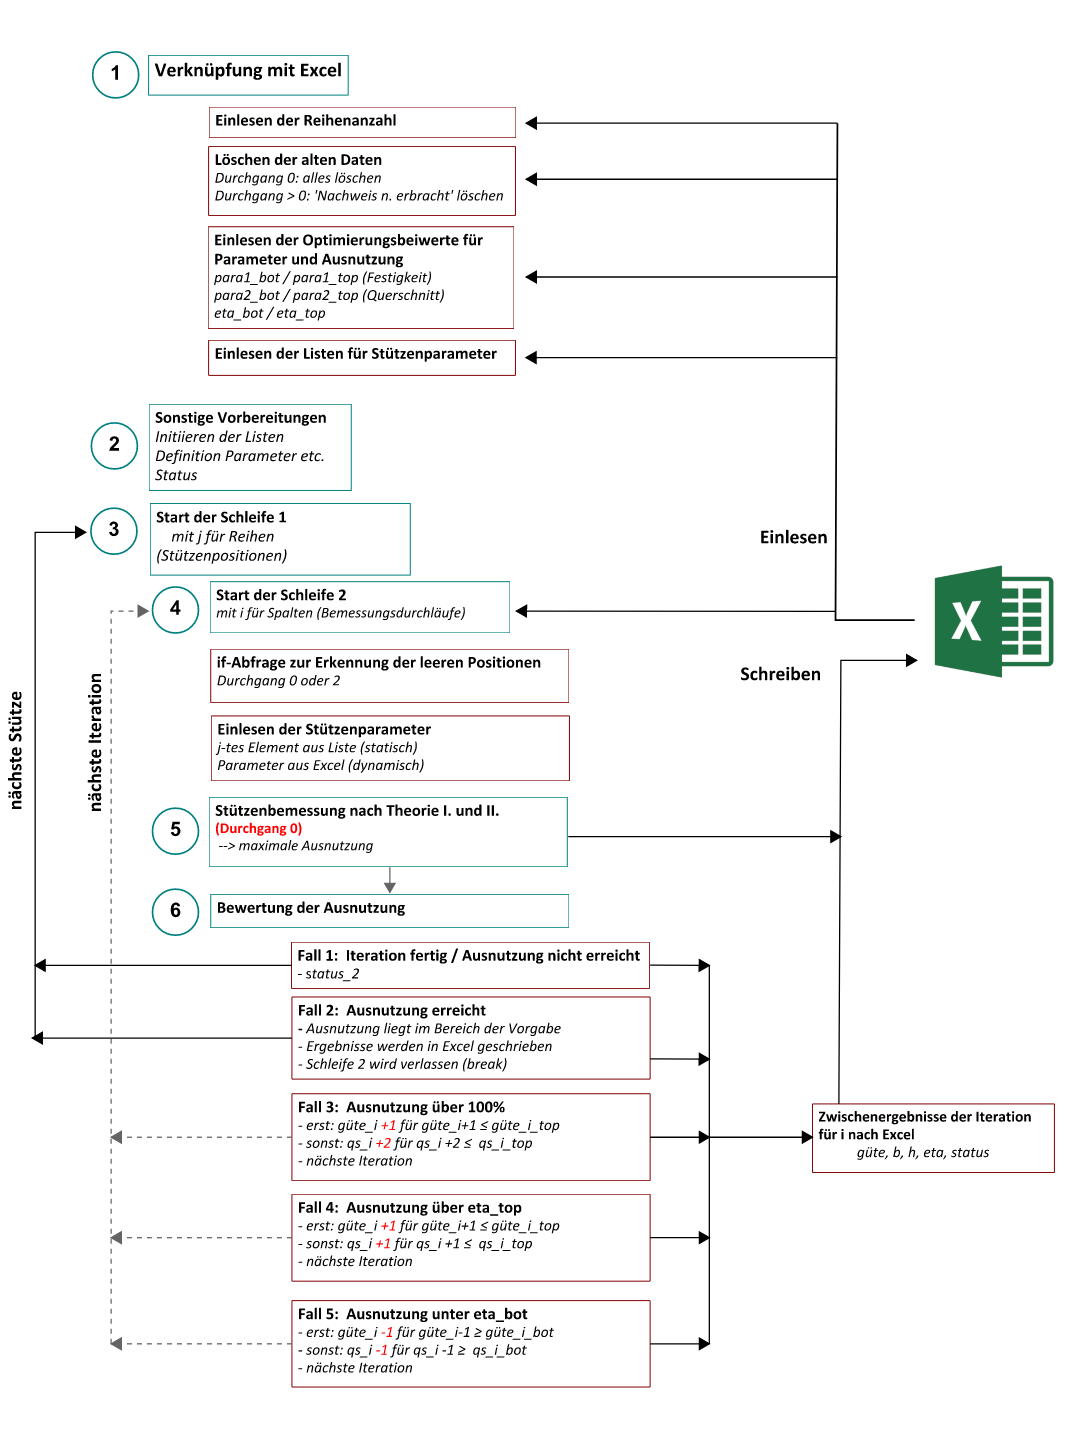
<center> Abbildung 3: Detailliertes Schema zum Optimierungsalgorithmus</center> <br>

## Vollständiger Code

<div class="alert alert-block alert-danger">
<b>Achtung:</b> Die Ausführung der folgenden Zeilen führt einen Code im Stützenbemessungsprogramm (Stützenbemessung_ec5_63.xlsm) aus.
</div>

In [1]:
# Stützenbemessungsprogramm: Optimierungsalgorithmus
# Bibliotheken
import xlwings as xw  # Interaktion mit Excel
%run 3.4_Anwendungsbeispiel_1_Erstellung_von_Funktionen.ipynb

# Excel
wb = xw.Book('Stützenbemessung_ec5_63.xlsm')
ws = wb.sheets['Stützenbemessung']

# Startreihe
startrow = 10
rownum = ws.range('G10').current_region.last_cell.row
colnum = ws.range((startrow, 1)).current_region.last_cell.column
n = rownum-startrow

# Alte Daten löschen
for i in range(n-1):
    if ws.range('BH10').offset(i, 0).value == 'NW n. erbracht':
        ws.range((startrow+i, 45), (startrow+i, 61)).value = ''
    else:
        iii = ""

# Status
ws.range('BH8').value = 'läuft..'

# Optimierung
# Ausnutzung
eta_target_top = ws.range('D37').value
eta_target_bot = ws.range('D38').value

# Querschnitt
para1_target_top = ws.range('D32').value
para1_target_bot = ws.range('D33').value
para1_steps = ws.range('D34').value
n_steps = (para1_target_top-para1_target_bot)/para1_steps

# Güte
para2_target_top = ws.range('D28').value
para2_target_bot = ws.range('D29').value

L_güte = ['GL 24h', 'GL 24c', 'GL 28h', 'GL 28c', 'GL 32h', 'GL 32c']
index_top = L_güte.index(para2_target_top)
index_bot = L_güte.index(para2_target_bot)

# Einlesen der Listen
L_pos = ws.range((startrow, 7), (rownum, 7)).value
L_ges = ws.range((startrow, 8), (rownum, 8)).value
L_system = ws.range((startrow, 9), (rownum, 9)).value
L_L = ws.range((startrow, 10), (rownum, 10)).value
L_b = ws.range((startrow, 11), (rownum, 11)).value
L_h = ws.range((startrow, 12), (rownum, 12)).value
L_N_ed = ws.range((startrow, 13), (rownum, 13)).value
L_M_yd = ws.range((startrow, 14), (rownum, 14)).value
L_M_zd = ws.range((startrow, 15), (rownum, 15)).value
L_h_art = ws.range((startrow, 16), (rownum, 16)).value
L_f_c0k = ws.range((startrow, 17), (rownum, 17)).value
L_f_myk = ws.range((startrow, 18), (rownum, 18)).value
L_E0mean = ws.range((startrow, 19), (rownum, 19)).value
L_E_05 = ws.range((startrow, 20), (rownum, 20)).value
L_G_05 = ws.range((startrow, 21), (rownum, 21)).value
L_k_mod = ws.range((startrow, 22), (rownum, 22)).value
L_gamma = ws.range((startrow, 23), (rownum, 23)).value

a1 = 'NW erfüllt'
a2 = 'NW n. erbracht'
a3 = 'Grenze'
L_n_iter = []
L_n_erf = []
L_n_nerf = []

# Starten der Schleife
# j für Reihen
for j in range(rownum - startrow + 1):
    # for j in range(30):
    ws.range('BH9').value = str(j) + '/' + str(n)
    güte = L_h_art[j]

    # i für Spalten
    for k, i in enumerate(range(5)):

        # Rechnet nur die leeren Positionen
        if ws.range('BH10').offset(j, 0).value == a1:
            break

        elif ws.range('BG10').offset(j, 0).value == None or ws.range('BH10').offset(j, 0).value == a2:

            # Definition der Variablen des i-ten Elements der Listen
            L = L_L[j]
            Lagerung = L_system[j]
            k_mod = L_k_mod[j]
            gamma = L_gamma[j]
            N_ed = L_N_ed[j]
            M_yd = L_M_yd[j]
            M_zd = L_M_zd[j]

            b = ws.range('K10').offset(j, 0).value
            h = ws.range('L10').offset(j, 0).value

            güte = ws.range('P10').offset(j, 0).value
            index = L_güte.index(güte)
            f_c0k = ws.range('Q10').offset(j, 0).value*1000
            f_myk = ws.range('R10').offset(j, 0).value*1000
            f_mzk = f_myk
            E0_mean = ws.range('S10').offset(j, 0).value*1000
            E_05 = ws.range('T10').offset(j, 0).value*1000
            G_05 = ws.range('U10').offset(j, 0).value*1000

            # Theorie I. Ordnung
            theta = 0
            E = E_05

            # Funktion
            e_0, L_lamb, L_lamb_rel, L_ky, L_kc, k_crit, sigma_cd, L_sigma_md, L_eta, nw = ec5_63_esv(
                Lagerung, güte, L, b, h, N_ed, M_yd, M_zd, theta, f_c0k, f_myk, f_mzk, E, G_05, k_mod, gamma)

            # Auswertung der Ergebnisse
            lamb = max(L_lamb)
            lamb_rel = max(L_lamb_rel)
            kc = min(L_kc)
            sigma_myd = L_sigma_md[0]
            sigma_mzd = L_sigma_md[1]
            eta_esv = max(L_eta)

            # Theorie II. Ordnung
            theta = 0.0025
            E = E0_mean/1.3
            no_iter = 5

            # Funktion
            L_e, L_M, L_e_total, L_M_total, sigma_cd, L_sigma_mIId, eta_th2, ii = ec5_63_th2(
                Lagerung, güte, L, b, h, N_ed, M_yd, M_zd, theta, f_c0k, f_myk, f_mzk, E, k_mod, gamma, no_iter)

            # Auswertung der Ergebnisse
            L_e_y = L_e[0]
            L_M_y = L_M[0]
            L_e_total_y = L_e_total[0]
            L_M_total_y = L_M_total[0]

            L_e_z = L_e[1]
            L_M_z = L_M[1]
            L_e_total_z = L_e_total[1]
            L_M_total_z = L_e_total[1]

            # maximale Ausnutzung
            eta = max(eta_esv, eta_th2)
            ws.range('AS10').offset(j, i).value = güte
            ws.range('AX10').offset(j, i).value = round(b, 2)
            ws.range('BC10').offset(j, i).value = round(eta, 2)

            # FALL 1: Iteration fertig / Ausnutzung bereits erreicht
            if i == 4 and (eta > eta_target_top or eta < eta_target_bot):

                # Status
                ws.range('BH10').offset(j, 0).value = a2

                # ESV
                ws.range('Y10').offset(j, 0).value = round(lamb, 2)
                ws.range('Z10').offset(j, 0).value = round(lamb_rel, 2)
                ws.range('AA10').offset(j, 0).value = round(kc, 2)
                ws.range('AB10').offset(j, 0).value = round(k_crit, 2)
                ws.range('AC10').offset(j, 0).value = nw
                ws.range('AD10').offset(j, 0).value = sigma_cd
                ws.range('AE10').offset(j, 0).value = round(sigma_myd, 2)
                ws.range('AF10').offset(j, 0).value = round(sigma_mzd, 2)
                ws.range('AG10').offset(j, 0).value = round(eta_esv, 2)

                # TH2
                ws.range('AI10').offset(j, 0).value = L_e[0][0]
                ws.range('AJ10').offset(j, 0).value = L_M[0][0]
                ws.range('AK10').offset(j, 0).value = L_e_total[0][-1]
                ws.range('AL10').offset(j, 0).value = L_M_total[0][-1]

                ws.range('AM10').offset(j, 0).value = L_e[1][0]
                ws.range('AN10').offset(j, 0).value = L_M[1][0]
                ws.range('AO10').offset(j, 0).value = L_e_total[1][-1]
                ws.range('AP10').offset(j, 0).value = L_M_total[1][-1]
                ws.range('AQ10').offset(j, 0).value = eta_th2

            # FALL 2: Ausnutzung erreicht
            elif eta <= eta_target_top and eta >= eta_target_bot:

                # ESV
                ws.range('Y10').offset(j, 0).value = round(lamb, 2)
                ws.range('Z10').offset(j, 0).value = round(lamb_rel, 2)
                ws.range('AA10').offset(j, 0).value = round(kc, 2)
                ws.range('AB10').offset(j, 0).value = round(k_crit, 2)
                ws.range('AC10').offset(j, 0).value = nw
                ws.range('AD10').offset(j, 0).value = sigma_cd
                ws.range('AE10').offset(j, 0).value = round(sigma_myd, 2)
                ws.range('AF10').offset(j, 0).value = round(sigma_mzd, 2)
                ws.range('AG10').offset(j, 0).value = round(eta_esv, 2)

                # TH2
                ws.range('AI10').offset(j, 0).value = L_e[0][0]
                ws.range('AJ10').offset(j, 0).value = L_M[0][0]
                ws.range('AK10').offset(j, 0).value = L_e_total[0][-1]
                ws.range('AL10').offset(j, 0).value = L_M_total[0][-1]

                ws.range('AM10').offset(j, 0).value = L_e[1][0]
                ws.range('AN10').offset(j, 0).value = L_M[1][0]
                ws.range('AO10').offset(j, 0).value = L_e_total[1][-1]
                ws.range('AP10').offset(j, 0).value = L_M_total[1][-1]
                ws.range('AQ10').offset(j, 0).value = eta_th2

                # PARAMETER
                ws.range('K10').offset(j, 0).value = round(b, 2)
                ws.range('L10').offset(j, 0).value = round(h, 2)
                ws.range('P10').offset(j, 0).value = güte

                ws.range('AS10').offset(j, i).value = güte
                ws.range('AX10').offset(j, i).value = round(b, 2)
                ws.range('BC10').offset(j, i).value = round(eta, 2)

                # ITERATION
                ws.range('BH10').offset(j, 0).value = a1
                break

            # FALL 3: Ausnutzung über 100%
            elif eta > 1:
                # Güte: Grenze bereits erreicht
                if güte == para2_target_top:
                    # Querschnitt raufgesetzt
                    b = min(b+2*para1_steps, para1_target_top)
                    h = b
                    if b == para1_target_top and i < 4:
                        ws.range('BH10').offset(j, 0).value = a3
                        break

                else:
                    # Querschnitt bleibt / Güte wird raufgesetzt
                    b = b
                    h = h
                    güte = L_güte[min(index+1, index_top)]

            # FALL 4: Ausnutzung über eta_top
            elif eta > eta_target_top:
                # Güte: Grenze bereits erreicht
                if güte == para2_target_top:
                    # Querschnitt raufgesetzt
                    b = min(b+para1_steps, para1_target_top)
                    h = b

                    if b == para1_target_top and i < 4:
                        ws.range('BH10').offset(j, 0).value = a3
                        break

                else:
                    # Querschnitt bleibt / Güte wird raufgesetzt
                    b = b
                    h = h
                    güte = L_güte[min(index+1, index_top)]

            # FALL 5: Ausnutzung unter eta_bot
            elif eta < eta_target_bot:
                # Güte: Grenze bereits erreicht
                if güte == para2_target_bot:
                    b = max(b-para1_steps, para1_target_bot)
                    h = b

                    if b == para1_target_bot and i < 4:
                        ws.range('BH10').offset(j, 0).value = a3
                        break
                else:
                    b = b
                    h = h
                    güte = L_güte[max(index-1, index_bot)]

            # ITERATION
            ws.range('P10').offset(j, 0).value = güte
            ws.range('K10').offset(j, 0).value = round(b, 2)
            ws.range('L10').offset(j, 0).value = round(h, 2)

        else:
            continue

# Status
ws.range('BH8').value = 'abgeschlossen'

___
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022